In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
netflix_dataset = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt.zip',header=None,
                              names=['Cust_Id','Rating'],usecols=[0,1])

netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [ ]:
netflix_dataset.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [ ]:
netflix_dataset.shape

(24058263, 2)

In [ ]:
movie_count = netflix_dataset.isnull().sum()
movie_count

Cust_Id       0
Rating     4499
dtype: int64

In [ ]:
movie_count1 = movie_count['Rating']
movie_count1

4499

In [ ]:
customer_count=netflix_dataset['Cust_Id'].nunique()
customer_count

475257

In [ ]:
customer_count = customer_count-movie_count
customer_count

Cust_Id    475257
Rating     470758
dtype: int64

In [ ]:
rating_count = netflix_dataset['Cust_Id'].count()-movie_count
rating_count

Cust_Id    24058263
Rating     24053764
dtype: int64

In [ ]:
stars = netflix_dataset.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


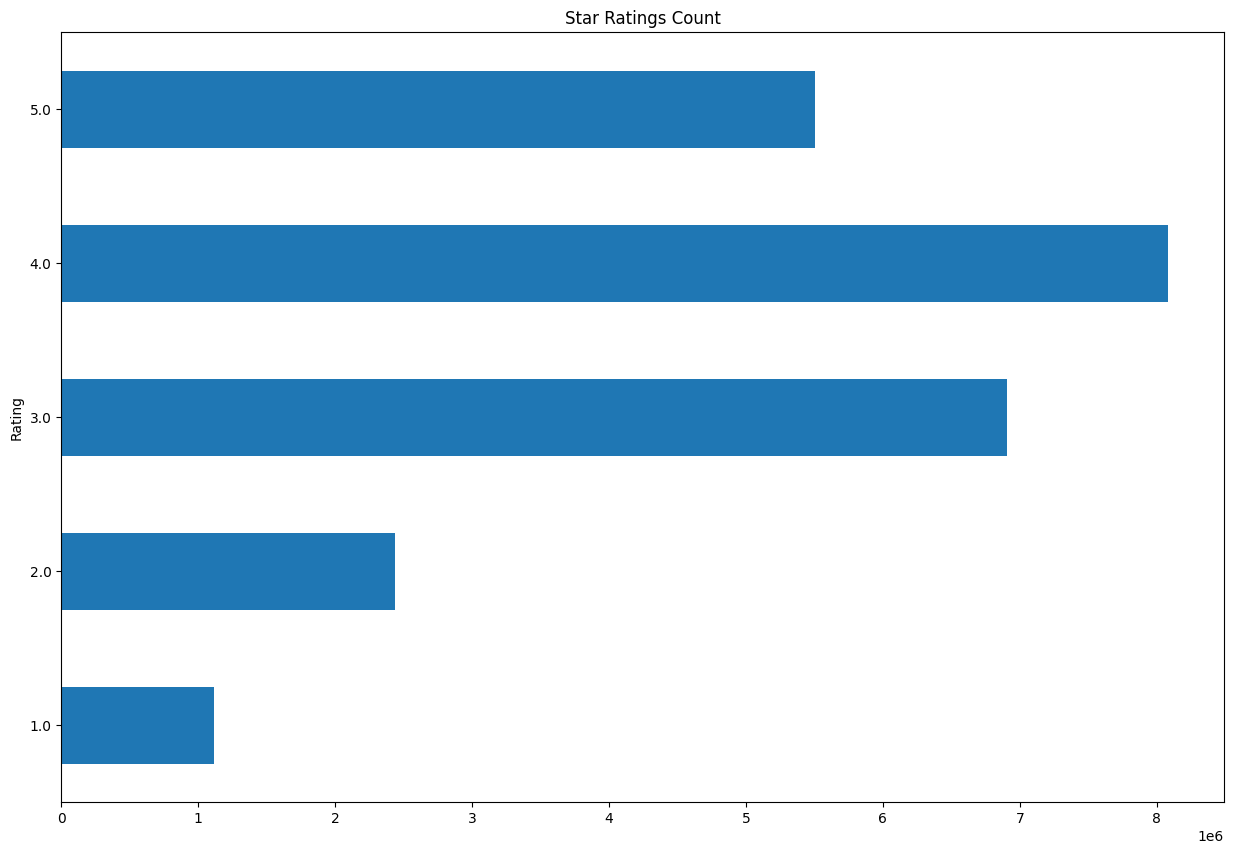

In [ ]:
ax = stars.plot(kind='barh', legend=False, figsize=(15, 10))
plt.title('Star Ratings Count')
plt.show()

In [ ]:
df_nan = pd.DataFrame((netflix_dataset.Rating.isnull()))


In [ ]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [ ]:
df_nan = df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [ ]:
df_nan.shape

(4499, 1)

In [ ]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [ ]:
df_nan = df_nan.reset_index()

In [ ]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [ ]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [ ]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [ ]:
len(netflix_dataset)

24058263

In [ ]:
df_nan.iloc[-1,0]-1

24057833

In [ ]:
movie_np = []
movie_id = 1
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
  temp=np.full((1,i-j-1), movie_id)
  movie_np = np.append(movie_np,temp)
  movie_id+=1


In [ ]:
len(netflix_dataset)-len(movie_np)

428

In [ ]:
last_record = np.full((1,428),movie_id)

In [ ]:
last_record.shape

(1, 428)

In [ ]:
netflix_dataset.shape

(24053764, 2)

In [ ]:
movie_np = np.append(movie_np,last_record)

In [ ]:
len(netflix_dataset)-len(movie_np)

0

In [ ]:
movie_np.astype(int)

array([   1,    1,    1, ..., 4499, 4499, 4499])

In [ ]:
len(movie_np)

24053764

In [ ]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_id'] = movie_np.astype(int)
netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)
print('Data transformation')
netflix_dataset

Data transformation


,Cust_Id,Rating,Movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
dataset_movie_summary = netflix_dataset.groupby('Movie_id')['Rating'].agg(['count'])
dataset_movie_summary

,count
Movie_id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
dataset_movie_summary['count'].quantile(0.6)

907.7999999999997

In [ ]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.6),0)
movie_benchmark

908.0

In [ ]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_id', length=2699)

In [ ]:
len(drop_movie_list)

2699

In [ ]:
dataset_cust_summary = netflix_dataset.groupby('Cust_Id')['Rating'].agg(['count'])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

36.0

In [ ]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

In [ ]:
len(drop_cust_list)

282042

In [ ]:
netflix_dataset = netflix_dataset[~netflix_dataset['Movie_id'].isin(drop_movie_list)]
netflix_dataset = netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print(f'Afte the triming, the shape is: {netflix_dataset.shape}')
netflix_dataset

Afte the triming, the shape is: (19695836, 3)


,Cust_Id,Rating,Movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [ ]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [ ]:
df_title = pd.read_csv("/content/drive/MyDrive/movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])


In [ ]:
df_title.head()

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [ ]:
!pip install scikit-surprise

In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader()

In [ ]:
data = Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_id','Rating']][:100000],reader)

In [ ]:
data

In [ ]:
model = SVD()

In [ ]:
cross_validate(model,data,measures=['RMSE','MAE'],cv=4)

{'test_rmse': array([1.01421687, 1.01255278, 1.02145394, 1.02622769]),
 'test_mae': array([0.81166838, 0.81246385, 0.81583757, 0.82561822]),
 'fit_time': (1.7287569046020508,
  2.623835802078247,
  1.8779208660125732,
  1.6588761806488037),
 'test_time': (0.13561224937438965,
  0.4471926689147949,
  0.3089301586151123,
  0.27906227111816406)}

In [ ]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [ ]:
user_1331154 = df_title.copy()
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_1331154 = user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_1331154['Estimate_score'] = user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154,x).est)

<ipython-input-183-26c95fdac7e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154['Estimate_score'] = user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154,x).est)


In [ ]:
user_1331154

,Movie_Id,Year,Name,Estimate_score
2,3,1997.0,Character,3.651205
4,5,2004.0,The Rise and Fall of ECW,4.124190
5,6,1997.0,Sick,3.395871
7,8,2004.0,What the #$*! Do We Know!?,3.515782
15,16,1996.0,Screamers,3.480080
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.631086
17766,17767,2004.0,Fidel Castro: American Experience,3.631086
17767,17768,2000.0,Epoch,3.631086
17768,17769,2003.0,The Company,3.631086


In [ ]:
user_1331154=user_1331154.sort_values('Estimate_score',ascending=False)
user_1331154

,Movie_Id,Year,Name,Estimate_score
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.446039
4,5,2004.0,The Rise and Fall of ECW,4.124190
17,18,1994.0,Immortal Beloved,3.937266
27,28,2002.0,Lilo and Stitch,3.910183
29,30,2003.0,Something's Gotta Give,3.811700
...,...,...,...,...
15,16,1996.0,Screamers,3.480080
16,17,2005.0,7 Seconds,3.410232
5,6,1997.0,Sick,3.395871
23,24,1981.0,My Bloody Valentine,2.675488


In [ ]:
user_1331154.head(5)

,Movie_Id,Year,Name,Estimate_score
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.446039
4,5,2004.0,The Rise and Fall of ECW,4.124190
17,18,1994.0,Immortal Beloved,3.937266
27,28,2002.0,Lilo and Stitch,3.910183
29,30,2003.0,Something's Gotta Give,3.811700


In [ ]:

user_1331154_df = netflix_dataset[netflix_dataset['Cust_Id'] == 1331154]
user_1331154_df


,Cust_Id,Rating,Movie_id
697,1331154,4.0,3
5178,1331154,4.0,8
31460,1331154,3.0,18
92840,1331154,4.0,30
224761,1331154,3.0,44
...,...,...,...
23439584,1331154,4.0,4389
23546489,1331154,2.0,4402
23649431,1331154,4.0,4432
23844441,1331154,3.0,4472


In [ ]:

user_1331154.rename(columns={'Movie_Id':'Movie_id'},inplace=True)
user_1331154 = user_1331154.merge(user_1331154_df,on='Movie_id',how='inner')
user_1331154


,Movie_id,Year,Name,Estimate_score,Cust_Id,Rating
0,18,1994.0,Immortal Beloved,3.937266,1331154,3.0
1,30,2003.0,Something's Gotta Give,3.811700,1331154,4.0
2,3,1997.0,Character,3.651205,1331154,4.0
3,1585,2001.0,Joy Ride,3.631086,1331154,3.0
4,1590,2001.0,Life as a House,3.631086,1331154,4.0
...,...,...,...,...,...,...
248,3265,1990.0,The Grifters,3.631086,1331154,3.0
249,3267,1994.0,Muriel's Wedding,3.631086,1331154,3.0
250,3182,1997.0,Private Parts,3.631086,1331154,1.0
251,3198,1991.0,The Addams Family,3.631086,1331154,4.0


In [ ]:
user_1331154.head(50)


,Movie_id,Year,Name,Estimate_score,Cust_Id,Rating
0,18,1994.0,Immortal Beloved,3.937266,1331154,3.0
1,30,2003.0,Something's Gotta Give,3.811700,1331154,4.0
2,3,1997.0,Character,3.651205,1331154,4.0
3,1585,2001.0,Joy Ride,3.631086,1331154,3.0
4,1590,2001.0,Life as a House,3.631086,1331154,4.0
5,1642,1995.0,Casino: 10th Anniversary Edition,3.631086,1331154,5.0
6,1615,1995.0,The American President,3.631086,1331154,4.0
7,1625,1986.0,Aliens: Collector's Edition,3.631086,1331154,4.0
8,1571,1982.0,Poltergeist,3.631086,1331154,4.0
9,1495,2001.0,Alias: Season 1,3.631086,1331154,5.0
